# 1. Import Library

In [1]:
from keras.datasets import cifar100
import numpy as np
from keras.utils import np_utils

np.random.seed(10)

# 資料準備

In [2]:
# 要訓練的類別索引列表
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [3]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


自動下載data set

In [4]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


順序標記訓練集和測試集的(資料數量,形狀和通道數量)
例:(50000筆,像素32*32,RGB圖片通道為3)

In [5]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
# 根據選取的類別索引篩選出對應的訓練樣本和標籤
selected_classes = [i for i in range(15)]
selected_train_samples = np.where(np.isin(y_label_train, selected_classes))[0]
x_img_train_selected = x_img_train_normalize[selected_train_samples]
y_label_train_selected = y_label_train[selected_train_samples]
y_label_train_selected_OneHot = np_utils.to_categorical(y_label_train_selected, len(selected_classes))

selected_test_samples = np.where(np.isin(y_label_test, selected_classes))[0]
x_img_test_selected = x_img_test_normalize[selected_test_samples]
y_label_test_selected = y_label_test[selected_test_samples]
y_label_test_selected_OneHot = np_utils.to_categorical(y_label_test_selected, len(selected_classes))


# 載入之前訓練的模型

In [15]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

# Load VGG16，and reshape into 32x32x3
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# build the top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

# setup the model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze the top of VGG16
for layer in base_model.layers:
    layer.trainable = False

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 訓練模型

In [16]:
train_history = model.fit(x_img_train_selected, 
                          y_label_train_selected_OneHot, 
                          batch_size=64, 
                          epochs=10, 
                          validation_data=(x_img_test_selected, y_label_test_selected_OneHot))


Epoch 1/10
118/118 [==============================] - 12s 21ms/step - loss: 1.8287 - accuracy: 0.4175 - val_loss: 1.4554 - val_accuracy: 0.5387
Epoch 2/10
118/118 [==============================] - 2s 13ms/step - loss: 1.3870 - accuracy: 0.5545 - val_loss: 1.3311 - val_accuracy: 0.5720
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 1.2548 - accuracy: 0.5955 - val_loss: 1.3144 - val_accuracy: 0.5687
Epoch 4/10
118/118 [==============================] - 2s 13ms/step - loss: 1.1689 - accuracy: 0.6224 - val_loss: 1.2632 - val_accuracy: 0.5980
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 1.1063 - accuracy: 0.6397 - val_loss: 1.2350 - val_accuracy: 0.5980
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 1.0480 - accuracy: 0.6628 - val_loss: 1.1891 - val_accuracy: 0.6153
Epoch 7/10
118/118 [==============================] - 2s 15ms/step - loss: 1.0029 - accuracy: 0.6741 - val_loss: 1.1818 - val_accuracy: 0.610

輸入圖像標籤文字

validatiom split:訓練集和測試集的比例,這次為50000:10000,所以是0.2

epochs:訓練週期10次

batch size:每批次輸入128張圖片

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

設定圖表欄位和格式

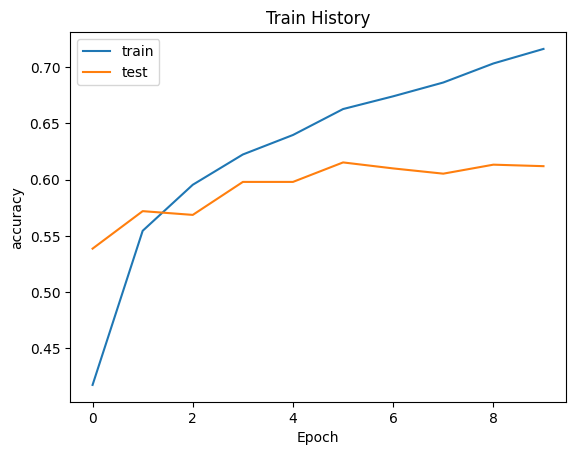

In [19]:
show_train_history('accuracy','val_accuracy')

accuracy:訓練時的準確率

val accuracy:驗證時的準確率

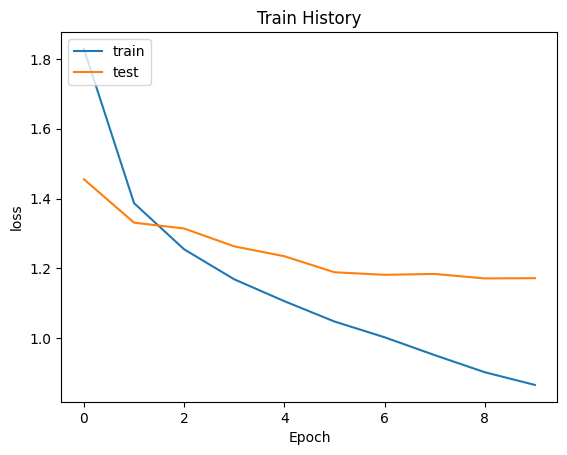

In [20]:
show_train_history('loss','val_loss')

loss:訓練時的誤差

val accuracy:驗證時的誤差

# 評估模型準確率

In [21]:
scores = model.evaluate(x_img_train_selected, 
                        y_label_train_selected_OneHot, verbose=0)
scores[1]

0.7433333396911621

# 進行預測

In [22]:
prediction=np.argmax(model.predict(x_img_test_selected), axis=-1)

47/47 [==============================] - 1s 9ms/step


In [23]:
prediction[:15]

array([14,  0,  8,  8,  6,  2,  6,  9,  2,  0, 10,  6,  5, 13,  7])

# 查看預測結果

In [24]:
label_dict={0: 'apple',
            1: 'aquarium_fish',
            2: 'baby',
            3: 'bear',
            4: 'beaver',
            5: 'bed',
            6: 'bee',
            7: 'beetle',
            8: 'bicycle',
            9: 'bottle',
            10: 'bowl',
            11: 'boy',
            12: 'bridge',
            13: 'bus',
            14: 'butterfly'
            }

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25  # difine the showed-image max
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        try:       
          title=str(i)+','+label_dict[labels[i][0]]
          if len(prediction)>0:
              title+='=>'+label_dict[prediction[i]]
              
          ax.set_title(title,fontsize=10) 
        except:
          None
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

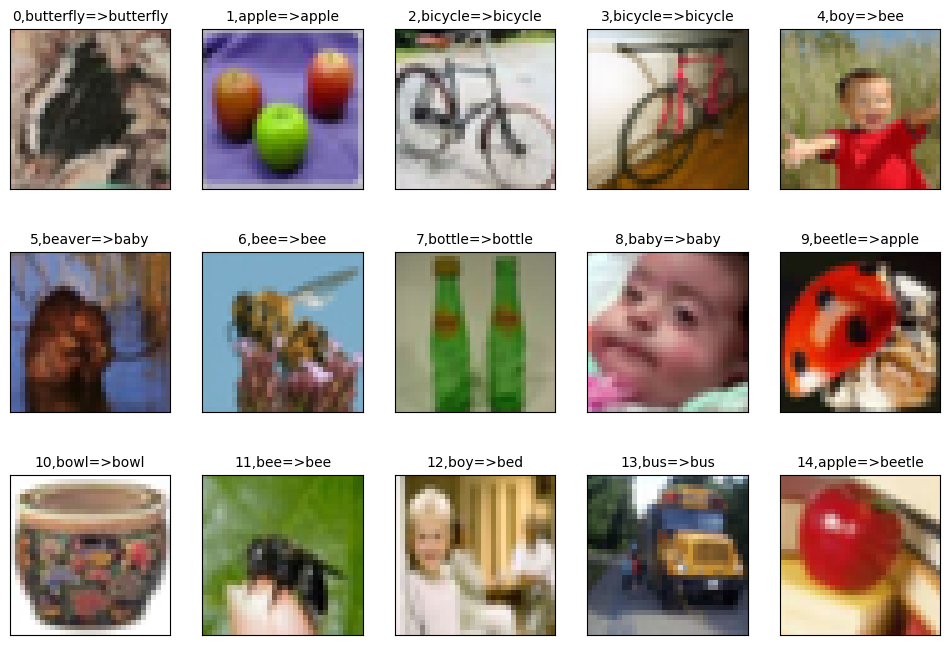

In [26]:
plot_images_labels_prediction(x_img_test_selected,
                              y_label_test_selected,
                              prediction,
                              0,
                              15)

# 查看預測機率

In [27]:
Predicted_Probability=model.predict(x_img_test_selected)

47/47 [==============================] - 0s 9ms/step


In [28]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: butterfly predict: butterfly


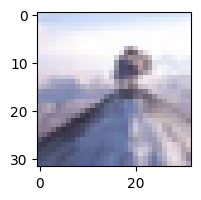

apple Probability:0.000003162
aquarium_fish Probability:0.000194499
baby Probability:0.004519333
bear Probability:0.050091796
beaver Probability:0.048829902
bed Probability:0.000010429
bee Probability:0.003531068
beetle Probability:0.119604364
bicycle Probability:0.001188429
bottle Probability:0.000340842


In [31]:
show_Predicted_Probability(y_label_test_selected,prediction,
                           x_img_test_selected,Predicted_Probability,0)

label: bicycle predict: bicycle


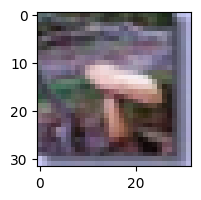

apple Probability:0.000139573
aquarium_fish Probability:0.000270834
baby Probability:0.010359723
bear Probability:0.000855012
beaver Probability:0.001999218
bed Probability:0.151893586
bee Probability:0.033593446
beetle Probability:0.017289460
bicycle Probability:0.710894227
bottle Probability:0.013226565


In [30]:
show_Predicted_Probability(y_label_test_selected,prediction,
                           x_img_test_selected,Predicted_Probability,3)

# confusion matrix

In [32]:
prediction.shape

(1500,)

建立混淆矩陣時結果資據必須為1維陣列,如果括號有多於一筆數據,則必須先進行數據處理

In [33]:
y_label_test_selected.shape

(1500, 1)

執行結果顯示已轉換為1維陣列

In [34]:
y_label_test_selected

array([[14],
       [ 0],
       [ 8],
       ...,
       [14],
       [ 7],
       [14]])

In [35]:
y_label_test_selected.reshape(-1)

array([14,  0,  8, ..., 14,  7, 14])

In [36]:
import pandas as pd
confusion_matrix = pd.crosstab(y_label_test_selected.reshape(-1),
                               prediction,
                               rownames=['label'], 
                               colnames=['predict'])

In [37]:
confusion_matrix

predict,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
label,,,,,,,,,,,,,,,
0,72,3,2,0,0,1,0,4,1,0,10,3,0,0,4
1,0,67,6,1,5,2,3,0,1,1,2,2,2,1,7
2,1,5,43,0,3,6,4,1,1,2,4,21,1,2,6
3,0,0,5,43,14,1,6,7,5,0,1,3,5,1,9
4,0,1,4,9,50,0,1,7,11,1,2,3,6,1,4
5,0,2,4,0,2,58,2,0,0,2,4,3,16,6,1
6,1,3,3,2,3,0,56,5,3,1,0,3,4,4,12
7,2,0,0,2,2,1,4,70,5,1,2,1,1,0,9
8,0,0,1,1,2,1,2,5,66,2,1,0,10,9,0


匯入pandas模組

reshape(-1)轉換1維陣列

測試資料的預測結果

設定行的名稱label

設定列的名稱是predict

In [38]:
print(label_dict)

{0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle', 10: 'bowl', 11: 'boy', 12: 'bridge', 13: 'bus', 14: 'butterfly'}


# Save model to Google Drive

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Save model to JSON

In [40]:
import os
try:
  os.makedirs('/content/Save/')
except:
  print("File existed")

In [41]:
model_json = model.to_json()
with open("/content/Save/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Weight to h5 

In [42]:
model.save_weights("/content/Save/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
